In [1]:
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define parameters for the helix
t = np.linspace(0, 4 * np.pi, 300)  # Time parameter
radius = 1.0
pitch = 0.15
offset = np.pi

# Parametric equations for two intertwined helices
x1 = radius * np.cos(t)
y1 = radius * np.sin(t)
z1 = pitch * t - 0.9

x2 = radius * np.cos(t + offset)
y2 = radius * np.sin(t + offset)
z2 = pitch * t - 0.9

In [3]:
## add little noise to the data
def add_noise(data, scale=0.1):
    return data + np.random.randn(*data.shape)*scale

def normalize(data):
    return (data-data.mean(axis=0, keepdims=True))/data.std(axis=0, keepdims=True)

In [4]:
# x1 = normalize(add_noise(x1, scale=0.01))
# y1 = normalize(add_noise(y1, scale=0.01))
# z1 = normalize(add_noise(z1, scale=0.01))

In [5]:
# x1 = normalize(x1)
# y1 = normalize(y1)
# z1 = normalize(z1)

In [24]:
! mkdir outputs/03.2_double_hellix_umap/

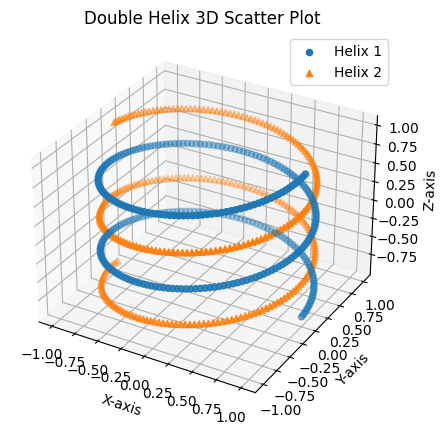

In [39]:
# Create a 3D scatter plot
# %matplotlib tk
%matplotlib inline

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the points for the first helix
ax.scatter(x1, y1, z1, marker='o', label='Helix 1')

# Plot the points for the second helix
ax.scatter(x2, y2, z2, marker='^', label='Helix 2')

# Add labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Double Helix 3D Scatter Plot')
ax.legend()

# Show the plot
# plt.show()
plt.savefig("./outputs/03.2_double_hellix_umap/helix_3d_scatter.pdf", bbox_inches='tight')

In [26]:
import umap

In [27]:
import umap.plot

In [28]:
xyz1 = np.vstack([x1, y1, z1]).T
xyz2 = np.vstack([x2, y2, z2]).T
xyz2.shape

(300, 3)

In [29]:
xyz = np.concatenate([xyz1, xyz2], axis=0)
xyz.shape

(600, 3)

In [30]:
labels = np.concatenate([np.zeros(x1.shape), np.ones(x2.shape)])

In [31]:
import numba

In [32]:
@numba.njit()
def dot_product(a,b): 
    return 1-np.dot(a,b)

@numba.njit()
def distance(a,b):
    return np.linalg.norm(a-b, ord=2)

@numba.njit()
def angle(a, b):
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    return 1-np.dot(a, b)/(norm_a*norm_b)    
    
#     a_u = a/(norm_a+1e-9)
#     b_u = b/(norm_b+1e-9)
    
#     return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
#     return np.dot(a_u, b_u)

@numba.njit()
def angle_partial(a, b):
    norm_b = np.linalg.norm(b)
    return 1-np.dot(a, b)/norm_b   

In [33]:
%matplotlib inline

In [34]:
mapper = umap.UMAP(metric=dot_product).fit(xyz)
# umap.plot.points(mapper, labels=labels)
tr = mapper.transform(xyz)

/home/tsuman/All_Files/Program_Files/miniconda/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(


In [35]:
tr.shape

(600, 2)

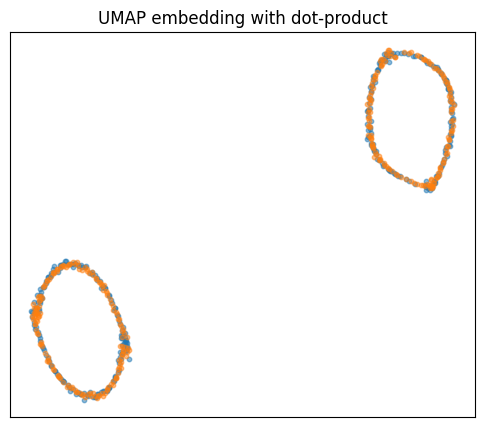

In [36]:
fig = plt.figure(figsize=(6, 5))
# ax = plt.gca()
# plt.scatter(tr[:, 0], tr[:, 1], label=labels, alpha=0.5, s=10, edgecolors='k')
mask = labels == 0
plt.scatter(tr[:, 0][mask], tr[:, 1][mask], label=labels[mask], alpha=0.5, s=10)
mask = ~mask
plt.scatter(tr[:, 0][mask], tr[:, 1][mask], label=labels[mask], alpha=0.5, s=10)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.title('UMAP embedding with dot-product')
# plt.show()
plt.savefig("./outputs/03.2_double_hellix_umap/umap_dot_product.pdf", bbox_inches='tight')

/home/tsuman/All_Files/Program_Files/miniconda/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(


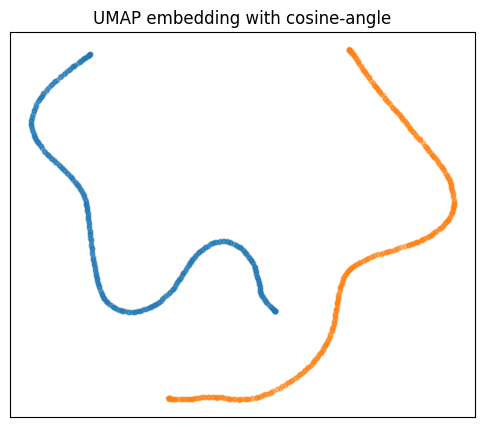

In [37]:
mapper = umap.UMAP(metric=angle).fit(xyz)
# umap.plot.points(mapper, labels=labels)
tr = mapper.transform(xyz)

fig = plt.figure(figsize=(6, 5))
mask = labels == 0
plt.scatter(tr[:, 0][mask], tr[:, 1][mask], label=labels[mask], alpha=0.5, s=10)
mask = ~mask
plt.scatter(tr[:, 0][mask], tr[:, 1][mask], label=labels[mask], alpha=0.5, s=10)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# plt.show()
plt.title('UMAP embedding with cosine-angle')
plt.savefig("./outputs/03.2_double_hellix_umap/umap_cosine_angle.pdf", bbox_inches='tight')

/home/tsuman/All_Files/Program_Files/miniconda/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(


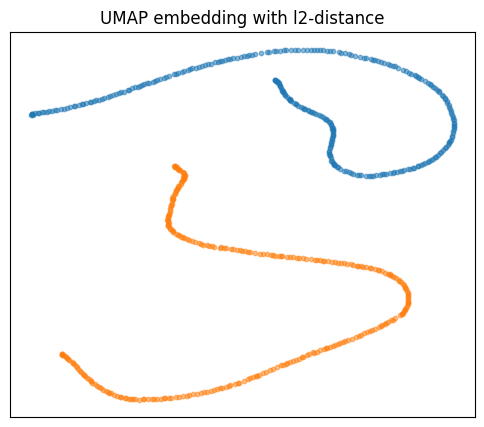

In [38]:
mapper = umap.UMAP(metric=distance).fit(xyz)
# umap.plot.points(mapper, labels=labels)

tr = mapper.transform(xyz)

fig = plt.figure(figsize=(6, 5))
mask = labels == 0
plt.scatter(tr[:, 0][mask], tr[:, 1][mask], label=labels[mask], alpha=0.5, s=10)
mask = ~mask
plt.scatter(tr[:, 0][mask], tr[:, 1][mask], label=labels[mask], alpha=0.5, s=10)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# plt.show()
plt.title('UMAP embedding with l2-distance')
plt.savefig("./outputs/03.2_double_hellix_umap/umap_l2_distance.pdf", bbox_inches='tight')

/home/tsuman/All_Files/Program_Files/miniconda/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(


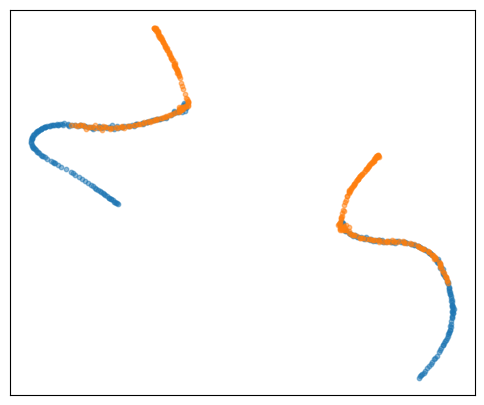

In [20]:
mapper = umap.UMAP(metric=angle_partial).fit(xyz)
# umap.plot.points(mapper, labels=labels)

tr = mapper.transform(xyz)

fig = plt.figure(figsize=(6, 5))
mask = labels == 0
plt.scatter(tr[:, 0][mask], tr[:, 1][mask], label=labels[mask], alpha=0.5, s=10)
mask = ~mask
plt.scatter(tr[:, 0][mask], tr[:, 1][mask], label=labels[mask], alpha=0.5, s=10)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.show()